In [9]:
import pandas as pd

# Load the health dataset (you can use your own file path or URL)
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
    'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'
]

# Load the dataset into a DataFrame work
df = pd.read_csv(url, names=column_names)

# Display first few rows
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
# Check for missing values
print(df.isnull().sum())

# Replace 0 values (in specific columns like Glucose, BloodPressure, etc.) with NaN and then fill them
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, pd.NA)

# Fill missing values with the median of the respective column
df.fillna(df.median(), inplace=True)

# Separate features (X) and target (y)
X = df.drop('Outcome', axis=1)  # All columns except Outcome
y = df['Outcome']  # The target column

# Split data into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (important for Logistic Regression)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


/var/folders/3m/7_13xy5x3mnfhvpyhnswh7qc0000gn/T/ipykernel_63404/1104468260.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(df.median(), inplace=True)


In [13]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train_scaled, y_train)

# Evaluate model on training data
train_accuracy = model.score(X_train_scaled, y_train)
print(f"Training Accuracy: {train_accuracy:.2f}")


Training Accuracy: 0.77


Test Accuracy: 0.75

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



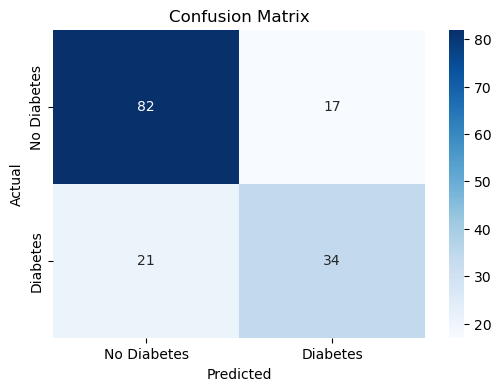

In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [17]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(LogisticRegression(max_iter=200), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Print best parameters from grid search
print(f"Best Parameters: {grid_search.best_params_}")

# Train the best model
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_best = best_model.predict(X_test_scaled)
print(f"Best Model Test Accuracy: {accuracy_score(y_test, y_pred_best):.2f}")


Best Parameters: {'C': 1, 'solver': 'liblinear'}
Best Model Test Accuracy: 0.75


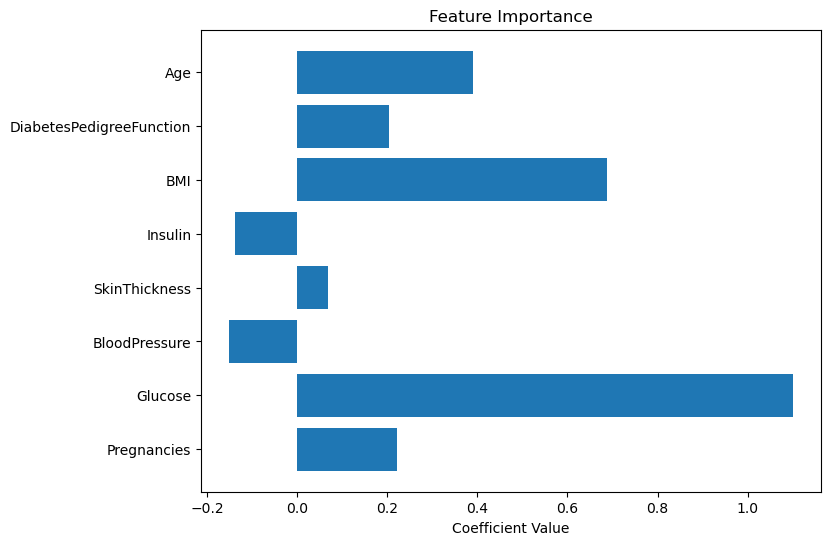

In [19]:
# Model Coefficients
coefficients = best_model.coef_[0]  # Get coefficients for the model (if multivariate)

# Feature names
features = X.columns

# Plot the coefficients
plt.figure(figsize=(8, 6))
plt.barh(features, coefficients)
plt.xlabel('Coefficient Value')
plt.title('Feature Importance')
plt.show()


In [21]:
import joblib

# Save the model and the scaler
joblib.dump(best_model, 'diabetes_logistic_regression_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

# To load the saved model:
# model = joblib.load('diabetes_logistic_regression_model.pkl')
# scaler = joblib.load('scaler.pkl')


['scaler.pkl']

In [23]:
# Example new data (patient's health info)
new_patient_data = [[6, 148, 72, 35, 0, 33.6, 0.627, 50]]  # Example: Pregnancies, Glucose, BloodPressure, etc.
new_patient_data_scaled = scaler.transform(new_patient_data)  # Scale it first

# Load the model
model = joblib.load('diabetes_logistic_regression_model.pkl')

# Make prediction
prediction = model.predict(new_patient_data_scaled)

# Output the result
print("Predicted Outcome:", "Diabetes" if prediction[0] == 1 else "No Diabetes")


Predicted Outcome: Diabetes


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [25]:
pip install Flask



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [27]:
from flask import Flask, request, jsonify
import joblib
import numpy as np

# Load the pre-trained model and scaler
model = joblib.load('diabetes_logistic_regression_model.pkl')
scaler = joblib.load('scaler.pkl')

# Initialize the Flask application
app = Flask(__name__)

@app.route('/')
def home():
    return "Welcome to the Diabetes Prediction API!"

@app.route('/predict', methods=['POST'])
def predict():
    # Get the data from the request
    data = request.get_json(force=True)

    # Extract features from input data
    features = np.array([data['Pregnancies'], data['Glucose'], data['BloodPressure'],
                         data['SkinThickness'], data['Insulin'], data['BMI'],
                         data['DiabetesPedigreeFunction'], data['Age']])

    # Scale the features
    scaled_features = scaler.transform([features])

    # Get prediction from the model
    prediction = model.predict(scaled_features)

    # Return the prediction as JSON
    result = {"prediction": "Diabetes" if prediction[0] == 1 else "No Diabetes"}
    return jsonify(result)

if __name__ == "__main__":
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (fsevents)
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/opt/anaconda3/lib/python3.12/site-packages/traitlets/config/application.py", line 1074, in launch_instance
    app.initialize(argv)
  File "/opt/anaconda3/lib/python3.12/site-packages/traitlets/config/application.py", line 118, in inner
    return method(app, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/ipykernel/kernelapp.py", line 654, in initialize
    self.

SystemExit: 1

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
